In [32]:
library(ssr)
library(caret)
library(glmnet)
library(Matrix)
library(elasticnet)
library(randomForest)

In [24]:
roughContact1 <- read.csv('../../../data/RoughContact/newPulloffJan28th.csv', header = TRUE,  sep = ';')[, -1]
roughContact2 <- read.csv('../../../data/RoughContact/pulloff4AIlabelled.csv', header = TRUE,  sep = ',')[, -1]
roughContactUnlabeled <- read.csv('../../../data/RoughContact/pulloff_unlabeled.csv', header = TRUE, sep = ',')[, -1]

roughContact <- rbind(roughContact1, roughContact2)

set.seed(43957)

L <- split_train_test(roughContact[, -1], pctTrain = 80)
U <- roughContactUnlabeled[, -1]

[1] "Initial RMSE on testdata: 0.0397"
[1] "Iteration 1 (testdata) RMSE: 0.0391 Improvement: 1.40%"
[1] "Iteration 2 (testdata) RMSE: 0.0388 Improvement: 2.15%"
[1] "Iteration 3 (testdata) RMSE: 0.0386 Improvement: 2.66%"
[1] "Iteration 4 (testdata) RMSE: 0.0383 Improvement: 3.58%"
[1] "Iteration 5 (testdata) RMSE: 0.0379 Improvement: 4.45%"
[1] "Iteration 6 (testdata) RMSE: 0.0376 Improvement: 5.25%"
[1] "Iteration 7 (testdata) RMSE: 0.0374 Improvement: 5.85%"
[1] "Iteration 8 (testdata) RMSE: 0.0371 Improvement: 6.44%"
[1] "Iteration 9 (testdata) RMSE: 0.0371 Improvement: 6.58%"
[1] "Iteration 10 (testdata) RMSE: 0.0372 Improvement: 6.31%"
[1] "Iteration 11 (testdata) RMSE: 0.0371 Improvement: 6.50%"
[1] "Iteration 12 (testdata) RMSE: 0.0372 Improvement: 6.35%"
[1] "Iteration 13 (testdata) RMSE: 0.0371 Improvement: 6.60%"
[1] "Iteration 14 (testdata) RMSE: 0.0370 Improvement: 6.85%"
[1] "Iteration 15 (testdata) RMSE: 0.0370 Improvement: 6.78%"
[1] "Iteration 16 (testdata) RMSE: 0.037

[1] 0.03741944

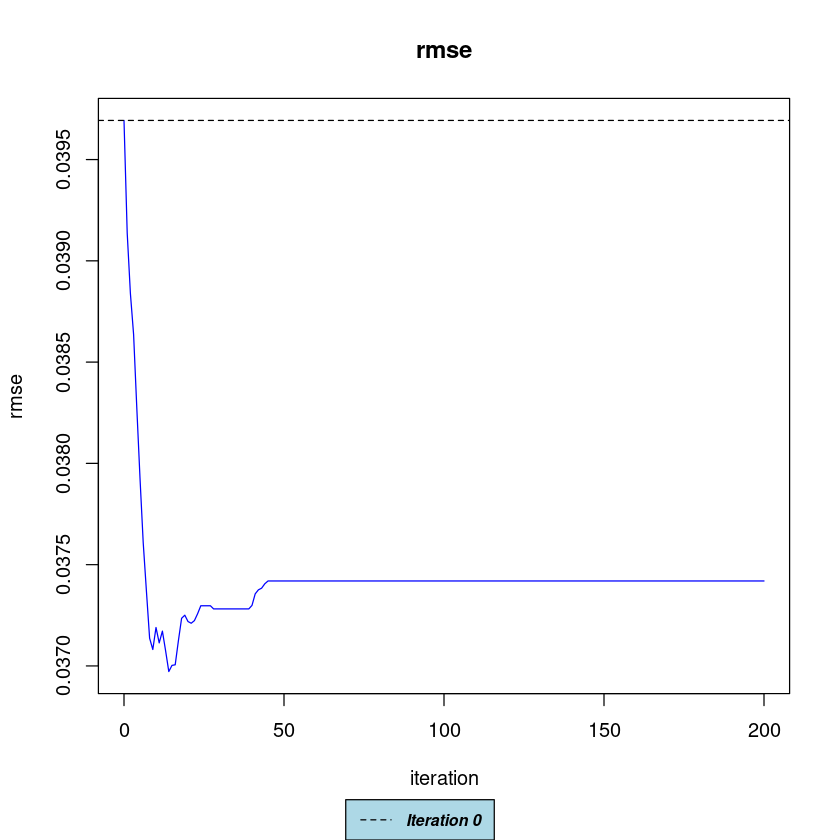

In [43]:
regressors <- list(svm=e1071::svm)
regressors.params = list(NULL)

model <- ssr("pulloff ~ .", regressors = regressors, regressors.params = regressors.params, L$trainset, U, testdata = L$testset, gr = 5, maxits = 200, pool.size = 1000)

plot(model)

preds <- predict(model, L$testset)

sqrt(mean((preds - L$testset$pulloff)^2))